<font size="5.2">Summary </font>  

Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. Text Similarity is one of the essential techniques of NLP which is being used to find the closeness between two chunks of text by surface or meaning. Computers require data to be converted into a numeric format to perform any machine learning task. On the surface is only word level similarity (lexical), these two phrases appear very similar as 3 of the 4 unique words are an exact overlap. This approach does not take into account the actual meaning behind words or the entire phrase in context. So, semantic similarity can be considered to focus on phrase/paragraph levels (or lexical chain level) where a piece of text is broken into a relevant group of related words prior to computing similarity. This notebook first presents an introduction to data processing for NLP and then text similarity for both surface and meaning level are applied. The approaches are **Jaccard** similarity, **Cosine** similarity, **Inverse Document Frequency**, **Glove pre-trained method*8 and **Word Mover Distance**.

Python functions and data files to run this notebook are in my [Github](https://github.com/MehdiRezvandehy/Text_Similarity.git) page.

In [1]:
#nltk.download()
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import xlrd
from math import log
import scipy
import re
import nltk
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML
from functions import* # import require functions to run this notebook

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MehdiRezvandehy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Appendix" data-toc-modified-id="Appendix-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Appendix</a></span></li><li><span><a href="#Tokenization" data-toc-modified-id="Tokenization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tokenization</a></span><ul class="toc-item"><li><span><a href="#sent_tokenize" data-toc-modified-id="sent_tokenize-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><code>sent_tokenize</code></a></span></li><li><span><a href="#regexp_tokenize" data-toc-modified-id="regexp_tokenize-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><code>regexp_tokenize</code></a></span></li><li><span><a href="#TweetTokenizer" data-toc-modified-id="TweetTokenizer-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><code>TweetTokenizer</code></a></span></li></ul></li><li><span><a href="#Bag-of-Words-(BoW)" data-toc-modified-id="Bag-of-Words-(BoW)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bag of Words (BoW)</a></span><ul class="toc-item"><li><span><a href="#Stop-words" data-toc-modified-id="Stop-words-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Stop words</a></span></li><li><span><a href="#Stemming" data-toc-modified-id="Stemming-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Stemming</a></span></li><li><span><a href="#Lemmatization" data-toc-modified-id="Lemmatization-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Lemmatization</a></span></li><li><span><a href="#Spell-checking" data-toc-modified-id="Spell-checking-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Spell checking</a></span></li></ul></li><li><span><a href="#Jaccard-Similarity" data-toc-modified-id="Jaccard-Similarity-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Jaccard Similarity</a></span></li><li><span><a href="#CountVectorizer-Method-+-Cosine-Similarity" data-toc-modified-id="CountVectorizer-Method-+-Cosine-Similarity-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>CountVectorizer Method + Cosine Similarity</a></span></li><li><span><a href="#Word-Importance-by-Inverse-Document-Frequency-(-tf-idf)+-Cosine-Similarity" data-toc-modified-id="Word-Importance-by-Inverse-Document-Frequency-(-tf-idf)+-Cosine-Similarity-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Word Importance by Inverse Document Frequency ( tf-idf)+ Cosine Similarity</a></span></li><li><span><a href="#Glove-Pre-trained-Method-+-Cosine-Similarity" data-toc-modified-id="Glove-Pre-trained-Method-+-Cosine-Similarity-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Glove Pre-trained Method + Cosine Similarity</a></span></li><li><span><a href="#Word-Mover’s-Distance" data-toc-modified-id="Word-Mover’s-Distance-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Word Mover’s Distance</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Example</a></span><ul class="toc-item"><li><span><a href="#Lexical-Similarity" data-toc-modified-id="Lexical-Similarity-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Lexical Similarity</a></span><ul class="toc-item"><li><span><a href="#Jaccard-Similarity" data-toc-modified-id="Jaccard-Similarity-9.1.1"><span class="toc-item-num">9.1.1&nbsp;&nbsp;</span>Jaccard Similarity</a></span></li><li><span><a href="#tf-idf+-Cosine-Similarity" data-toc-modified-id="tf-idf+-Cosine-Similarity-9.1.2"><span class="toc-item-num">9.1.2&nbsp;&nbsp;</span>tf-idf+ Cosine Similarity</a></span></li></ul></li><li><span><a href="#Semantical-Similarity" data-toc-modified-id="Semantical-Similarity-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Semantical Similarity</a></span><ul class="toc-item"><li><span><a href="#Glove-Model-+-Cosine-Similarity" data-toc-modified-id="Glove-Model-+-Cosine-Similarity-9.2.1"><span class="toc-item-num">9.2.1&nbsp;&nbsp;</span>Glove Model + Cosine Similarity</a></span></li><li><span><a href="#Word-Mover’s-Distance" data-toc-modified-id="Word-Mover’s-Distance-9.2.2"><span class="toc-item-num">9.2.2&nbsp;&nbsp;</span>Word Mover’s Distance</a></span></li></ul></li></ul></li></ul></div>

# Tokenization

The first step of NLP is to separate a corpus into documents and a document into words. This process is called tokenization because the resulting tokens contain words and punctuations. Although the process sounds trivial, there are many non-trivial language-specific issues. Think about the different uses of periods, commas, and quotes. The [Natural Language Toolkit](https://www.nltk.org/api/nltk.tokenize.html) (`nltk`) Python package provides implementations and pre-trained transformers for many NLP algorithms, as well as for word tokenization.

In [2]:
document="Almost before we knew it, we had left the ground. The unknown holds its grounds."

In [3]:
#Tokenization
from nltk.tokenize import word_tokenize
tokens = word_tokenize(document)
tokens

['Almost',
 'before',
 'we',
 'knew',
 'it',
 ',',
 'we',
 'had',
 'left',
 'the',
 'ground',
 '.',
 'The',
 'unknown',
 'holds',
 'its',
 'grounds',
 '.']

Other `nltk` tokenizers are as below:

## `sent_tokenize`

It tokenizes a document into sentences:

In [4]:
from nltk.tokenize import sent_tokenize
sent_tokenize(document)

['Almost before we knew it, we had left the ground.',
 'The unknown holds its grounds.']

## `regexp_tokenize`

It tokenizes a string or document based on a regular expression pattern:

In [5]:
from nltk.tokenize import regexp_tokenize
s = "Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\n\nThanks."
regexp_tokenize(s, pattern='\w+|\$[\d\.]+|\S+')

['Good',
 'muffins',
 'cost',
 '$3.88',
 'in',
 'New',
 'York',
 '.',
 'Please',
 'buy',
 'me',
 'two',
 'of',
 'them',
 '.',
 'Thanks',
 '.']

## `TweetTokenizer`

Usually used for tweet tokenization, which allows to separate hashtags, mentions and lots of exclamation points:

In [6]:
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()
tweet = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <-- @remy: This is waaaaayyyy too much for you!!!!!!"
print(tt.tokenize(tweet))

['This', 'is', 'a', 'cooool', '#dummysmiley', ':', ':-)', ':-P', '<3', 'and', 'some', 'arrows', '<', '>', '->', '<--', '@remy', ':', 'This', 'is', 'waaaaayyyy', 'too', 'much', 'for', 'you', '!', '!', '!']


# Bag of Words (BoW)
    
BoW only counts the words in document after tokenization. The more frequent a word is, the more importance it could have in a text. Based on the number of words used in a text, significant words can be defined:

In [7]:
from collections import Counter

words="Almost before we knew it, we had left the ground. The unknown holds its grounds."
tokens=word_tokenize(words)
Counter(tokens)

Counter({'Almost': 1,
         'before': 1,
         'we': 2,
         'knew': 1,
         'it': 1,
         ',': 1,
         'had': 1,
         'left': 1,
         'the': 1,
         'ground': 1,
         '.': 2,
         'The': 1,
         'unknown': 1,
         'holds': 1,
         'its': 1,
         'grounds': 1})

As you can see, data processing should be applied before using BOW

## Stop words

In the preceding code, **word.islanum()** function is used to extract only alphanumeric tokens and make them all lowercase. The preceding list of words already looks much better than the initial naive model. However, it still contains a lot of unnecessary words, such as **the, we, had,** and so on, **which don't convey any information.**

In order to filter out the noise for a specific language, it makes sense to remove these words that appear often in texts and don't have any semantic meaning. The so-called **stop words** are usually removed using a **pre-trained** look-up dictionary. This can be done by pre-trained **nltk** library in Python.

In [8]:
# Remove punctuation
words = [word.lower() for word in tokens if word.isalnum()]
words

['almost',
 'before',
 'we',
 'knew',
 'it',
 'we',
 'had',
 'left',
 'the',
 'ground',
 'the',
 'unknown',
 'holds',
 'its',
 'grounds']

In [9]:
#Stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword_set = set(stopwords.words('english'))

words = [word for word in words if word not in stopword_set]
words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MehdiRezvandehy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['almost', 'knew', 'left', 'ground', 'unknown', 'holds', 'grounds']

## Stemming 

Removing the affixes of words to obtain the stem of a word is also called stemming. **Stemming** refers to a rule-based (heuristic) approach to transform each occurrence of a word into its word stem. Here is a simple example of some expected transformations: cars -> car

In [10]:
############## Stemming ##############
from nltk.stem import PorterStemmer

def stem(words):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

words = stem(words)
words

['almost', 'knew', 'left', 'ground', 'unknown', 'hold', 'ground']

## Lemmatization

When looking at the stemming examples, limitations of the approach is obvious. For example, irregular verb conjugations—such as "are", "am", or "is" that should all consider as "be"? This is lemmatization which tries to solve using a pre-trained set of vocabulary and conversion rules, called **lemmas**. The lemmas are stored in a look-up dictionary and look similar to the following transformations:

are -> be

is -> be

taught -> teach

better -> good

There is one very important point to make when speaking about lemmatization. Each lemma needs to be applied to the correct word type for **nouns**, **verbs**, **adjectives**, and so on. The reason for this is that a word can be either a **noun** or a **verb** in the past tense. Left could be an adjective or the past tense of leave. So, we also need to extract the word type from the word in a sentence. The process is called **Point of Speech (POS)** tagging.

Luckily, the **nltk** library has us covered once again. To estimate the correct POS tag, we also need to provide the punctuation:

In [11]:
#tokens_pos = categorize(tokens)
#words_pos = [pos for w, pos in zip(tokens, tokens_pos) if is_no_punctuation(w) and is_no_stopword(w)]
#print('Word categories:', words_pos)

In [12]:
############## Lemmatization ##############
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def categorize(words):
    tags = nltk.pos_tag(words)
    return [tag for word, tag in tags]

def lemmatize(words, tags):
    lemmatizer = WordNetLemmatizer()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    pos = [tag_dict.get(t[0].upper(), wordnet.NOUN) for t in tags]
    return [lemmatizer.lemmatize(w, pos=p) for w, p in zip(words, pos)]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MehdiRezvandehy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
words_pos = categorize(words) 
words  = set(lemmatize(words, words_pos)) 
words

{'almost', 'ground', 'hold', 'knew', 'leave', 'unknown'}

In [14]:
words_pos

['RB', 'JJ', 'VBN', 'NN', 'JJ', 'NN', 'NN']

More accurate BOW is:

In [15]:
Counter(words)

Counter({'ground': 1,
         'hold': 1,
         'almost': 1,
         'unknown': 1,
         'knew': 1,
         'leave': 1})

## Spell checking

See these pages [stackoverflow1](https://stackoverflow.com/questions/8870261/how-to-split-text-without-spaces-into-list-of-words/11642687#11642687), [stackoverflow2](https://stackoverflow.com/questions/47730524/spell-check-and-return-the-corrected-term-in-python)

It is required to load to copy these [125k words, sorted by frequency](http://controlc.com/c1666a6b) into a text file, name the file words-by-frequency.txt.

A cost dictionary is built using **Zipf's** law: it states that given a large sample of words used, `the frequency of any word` is inversely proportional to its rank in the frequency table. In fact, the word with rank $n$ in the list of words has probability roughly:

$\large probability=\frac{1}{n\times log (N)}$

where $N$ is the number of words in the dictionary.  Instead of directly using the probability we use a cost defined as the logarithm of the inverse of the probability as $-log(probability)$ to avoid overflows. It leads to equation below:

$\large probability=log((n)\times log(N)) $

In [16]:
import re

# assuming Zipf's law (https://en.wikipedia.org/wiki/Zipf%27s_law)  
# cost = -math.log(probability).
with open("./data/words-by-frequency.txt") as f:
    words = [line.strip() for line in f.readlines()]
    wordcost = dict((k, log((i+1)*log(len(words)))) for i,k in enumerate(words))
    # Maximum length for words
    maxword = max(len(x) for x in words)

In [17]:
document="""This is a tepid docu-drama that covers no new ground, 
reworks all the cliches and is sloppy with facts. For example, Munich is a very flat city. 
So why is it hilly in the movie? For example, the end of the Great War in 1918 was 
not a surrender but an armistice. Yet it is annoufnced as a surrender. For example, 
European news vendors did not (and do not) shout headlines as they hawk their papers. 
Yet this sctrictly American custom is employed in the film. For example, the Nazis did not 
adopt the German eagle until after they had taken power but there it is on the lectern as 
Hitler delivers one of his stem winders. Indeed, most of this disappointing production consists 
of little more than Hitlerian oratory. The movie also perpetuates the mycth that the beer hall 
putsch was hatched at the Munich Hoffbrauhaus. It was not. Robert Carlyle does a fine portrayal 
of his subject. But his supporting cast is adequate at best and very often not even that. These 
comments are based on the first episode only. One only can hope the second will be better but don't bet on it."""

In [18]:
result_df=spell_check(document,maxword=maxword,wordcost=wordcost)
result_df

,miss_spell,suggestion
0,cliche,clich e
1,annoufnced,an nou fn ced
2,sctrictly,sc tr ict ly
3,winder,win der
4,hitlerian,hitler ian
5,mycth,my c th
6,hoffbrauhaus,hoff bra u haus


# Jaccard Similarity

Jaccard similarity or intersection over union is defined as **size of intersection divided by size of union of two sets**. Let’s take example of two sentences:

In [19]:
document1='AI is our friend and it has been friendly'
document2='AI and humans have always been friendly'

<p>&nbsp;</p>
<img src="https://raw.githubusercontent.com/MehdiRezvandehy/Machine-Learning-Course-University-of-Calgary/master/Images/jacard.png" alt="drawing" width="500"/>
<p>&nbsp;</p>

Image retrieved from [medium](https://medium.com/@adriensieg/text-similarities-da019229c894)

In [20]:
Jaccard_Similarity(document1,document2,stopwords=False)

0.5

For the above two sentences, the Jaccard similarity is 5/(3+5+2) = 0.5 (stop words are not removed) which is size of intersection of the set divided by total size of set.

The issue with Jaccard similarity is it not able to capture semantic similarity nor lexical semantic sentences. **It only relies on number of common words.**

# CountVectorizer Method + Cosine Similarity

In [21]:
import pylab as plt
import math

def dotproduct(v1, v2):
    return sum((a*b) for a, b in zip(v1, v2))

def length(v):
    return math.sqrt(dotproduct(v, v))

def angle(v1, v2):
    return math.degrees(math.acos(dotproduct(v1, v2) / (length(v1) * length(v2))))  

* CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to **transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text**. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis).


* Cosine similarity calculates similarity by **measuring the cosine of angle between two vectors**. <span class="burk">It is a judgment of orientation and not magnitude</span>: two vectors with the same orientation have a cosine similarity of 1, two vectors oriented at 90° relative to each other have a similarity of 0, independent of their magnitude. If the angle is bigger than 90°, the similarity will be negative.


* The cosine similarity is advantageous because even if the **two similar documents are far apart by the Euclidean (yoo·kli·dee·uhn) distance (due to the size of the document), chances are they may still be oriented closer together.** The smaller the angle, higher the cosine similarity.


<p>&nbsp;</p>


$\large Similarity= cos(\theta)=\frac{\textbf{A}.\textbf{B}}{\left| \left| \textbf{A}\right| \right|\, \left| \left| \textbf{B} \right| \right|}=\frac{\sum_{i=1}^{n} A_{i}B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}}\sqrt{\sum_{i=1}^{n} B_{i}^{2}}}$

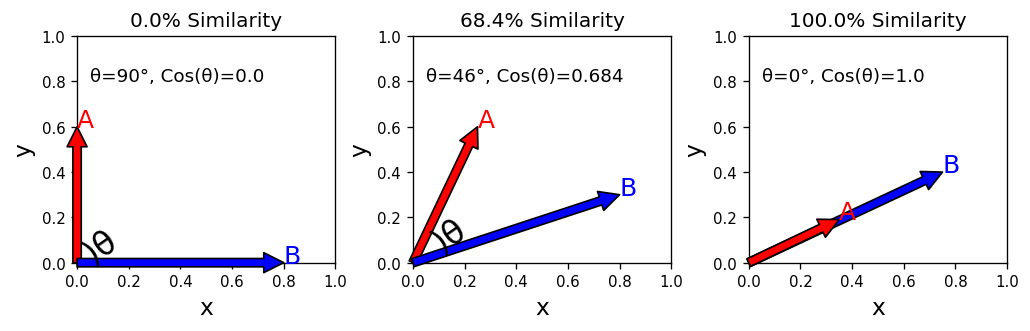

Documents should be converted to vectors first and then cosine of angle between two documents is calculated. See example below:

In [22]:
document1='AI is our friend and it has been friendly'
document2='AI and humans have always been friendly'

print('document1=', document1) 
print('document2=', document2) 
cos,df=Cosine_Similarity(document1,document2,stopwords=True,counts=True)

document1= AI is our friend and it has been friendly
document2= AI and humans have always been friendly


They can be converted to vector based on the frequency (count) of each word (after removing stop words) as below:

In [23]:
df

,ai,always,friend,friendly,human
document1,1,0,1,1,0
document2,1,1,0,1,1


Then, cosine similarity calculates similarity by measuring the cosine of angle between two vectors, document1 and document2:

In [24]:
print('Cosine Similarity=',cos)

Cosine Similarity= 0.5773502691896258


Here is a 2D example for Cosine Similarity:

In [25]:
document1='friend humans'
document2='humans'

cos,df=Cosine_Similarity(document1,document2,stopwords=True,counts=True)
a=df.iloc[0].values
b=df.iloc[1].values
print('Cosine Similarity=',cos)
print('\n Vector for document1 and 2') 
df

Cosine Similarity= 0.7071067811865475

 Vector for document1 and 2


,friend,human
document1,1,1
document2,0,1


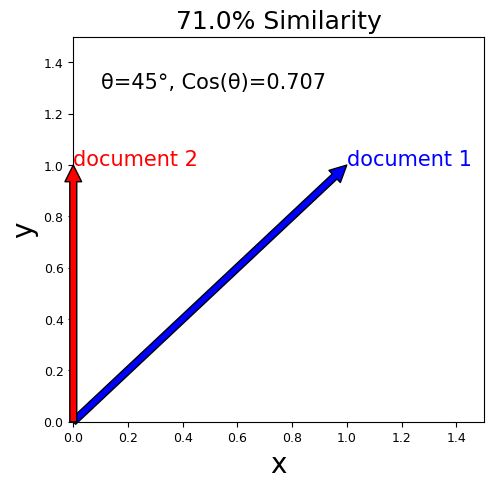

In [26]:
font = {'size'   :9}
plt.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(18, 5), dpi= 100, facecolor='w', edgecolor='k')

ax1=plt.subplot(1,3,1)

plt.annotate('',
             xy=(a[0],a[1]),
             xytext=(0, 0),
             fontsize=20,
             arrowprops=dict(facecolor='blue',width=5)
            )
plt.text(a[0],a[1], 'document 1', color='blue',fontsize=15)

plt.annotate('',
             xy=(b[0],b[1]),
             xytext=(0,0),
             fontsize=20,
             arrowprops=dict(facecolor='red', width=5)
            )

plt.text(b[0],b[1], 'document 2', color='red',fontsize=15)

plt.title(f'{np.round(math.cos(math.radians(angle(a,b))),2)*100}% Similarity',fontsize=18)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.ylim(0,1.5)
plt.xlim(0,1.5)
plt.text(0.1,1.3, f'θ={int(angle(a,b))}°, Cos(θ)={np.round(math.cos(math.radians(angle(a,b))),3)}', color='k',rotation=0,fontsize=15)
plt.show()

#  Word Importance by Inverse Document Frequency ( tf-idf)+ Cosine Similarity

* One particular downside of CountVectorizer Method is that the more often a term occurs, the higher its count (and therefore weight) will get. This is a problem since now any term that is not a stop word and appears often in the text will receive a high weight—independent of the importance of the term to a certain document.


* Instead of an absolute count of terms in a context, the count of terms in the context relative to a corpus of documents is calculated. **By doing so, higher weight is given to terms that appear only in a certain context, and reduced weight to terms that appear in many different documents.**

The term frequency (ft) counts all the terms in a document. The inverse document frequency (idf) is computed by dividing the total number of documents (N) by the counts of a term in all documents (fd). The idf term is usually log-transformed as the total count of a term across all documents can get quite large.

Term frequency-inverse document frequency weight is calculated by:

$\large \omega_{i,j}=tf_{i,j}.log(\frac{N}{df_{i}})$


* $\omega_{i,j}$ → weight of term $i$ in document $j$

* $tf_{i,j}$ → term frequency (number of occurrences) of term $i$ in document $j$

* $N$ → number of documents in the corpus

* $df_{i}$ → number of documents containing term $i$



For example, if number of documents in corpus is 30 and number of documents containing the "library" are 20, and frequency of "library" in the document is 8, then TF-idf wight for "library" is:

$\Large 8\times log(\frac{30}{20})=3.24$



See this [page](https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089) for more information.

In [27]:
document1='AI is our friend and it has been friendly'
document2='AI and humans have always been friendly'

print('document1=', document1) 
print('document2=', document2) 
print('\n') 
cos,df=Cosine_Similarity_tf_idf(document1,document2,stopwords=True,counts=True, tf_idf=True)
print('Cosine Similarity (tf_idf)=',cos)
print('\n Vector for document1 and 2') 
df

document1= AI is our friend and it has been friendly
document2= AI and humans have always been friendly


Cosine Similarity (tf_idf)= 0.4112070550676187

 Vector for document1 and 2


,ai,always,friend,friendly,human
document1,0.501549,0.000000,0.704909,0.501549,0.000000
document2,0.409937,0.576152,0.000000,0.409937,0.576152


# Glove Pre-trained Method + Cosine Similarity

* Previous technique cannot achieve similarity between two documents in term of meaning (semantic). For example, the meaning of two sentences below are very close to each other but there is no words in common so cosine (tf_idf) gives zero similarity:

In [28]:
document1='President greets the press in Chicago'
document2='Biden speaks to media in Illinois'

print('document1=', document1) 
print('document2=', document2) 
cos,df=Cosine_Similarity_tf_idf(document1,document2,stopwords=True,counts=True, tf_idf=True)
print('Cosine Similarity (tf_idf)=',cos)

document1= President greets the press in Chicago
document2= Biden speaks to media in Illinois
Cosine Similarity (tf_idf)= 0.0


Pre-trained models can be used to measure how frequently words co-occur with one another in a large corpus by calculating word vectors. A word vector is an attempt to mathematically represent the meaning of a word. In essence, a computer goes through some text (ideally a lot of text) and calculates how often words show up next to each other. These frequencies are represented with numbers.

For example in Figure below, king - queen is equal man - women, Germany to Berlin as China to Beijing. Deep learning algorithms are used to create word vectors and has been able to achieve this meaning based on how much those words are used through the text


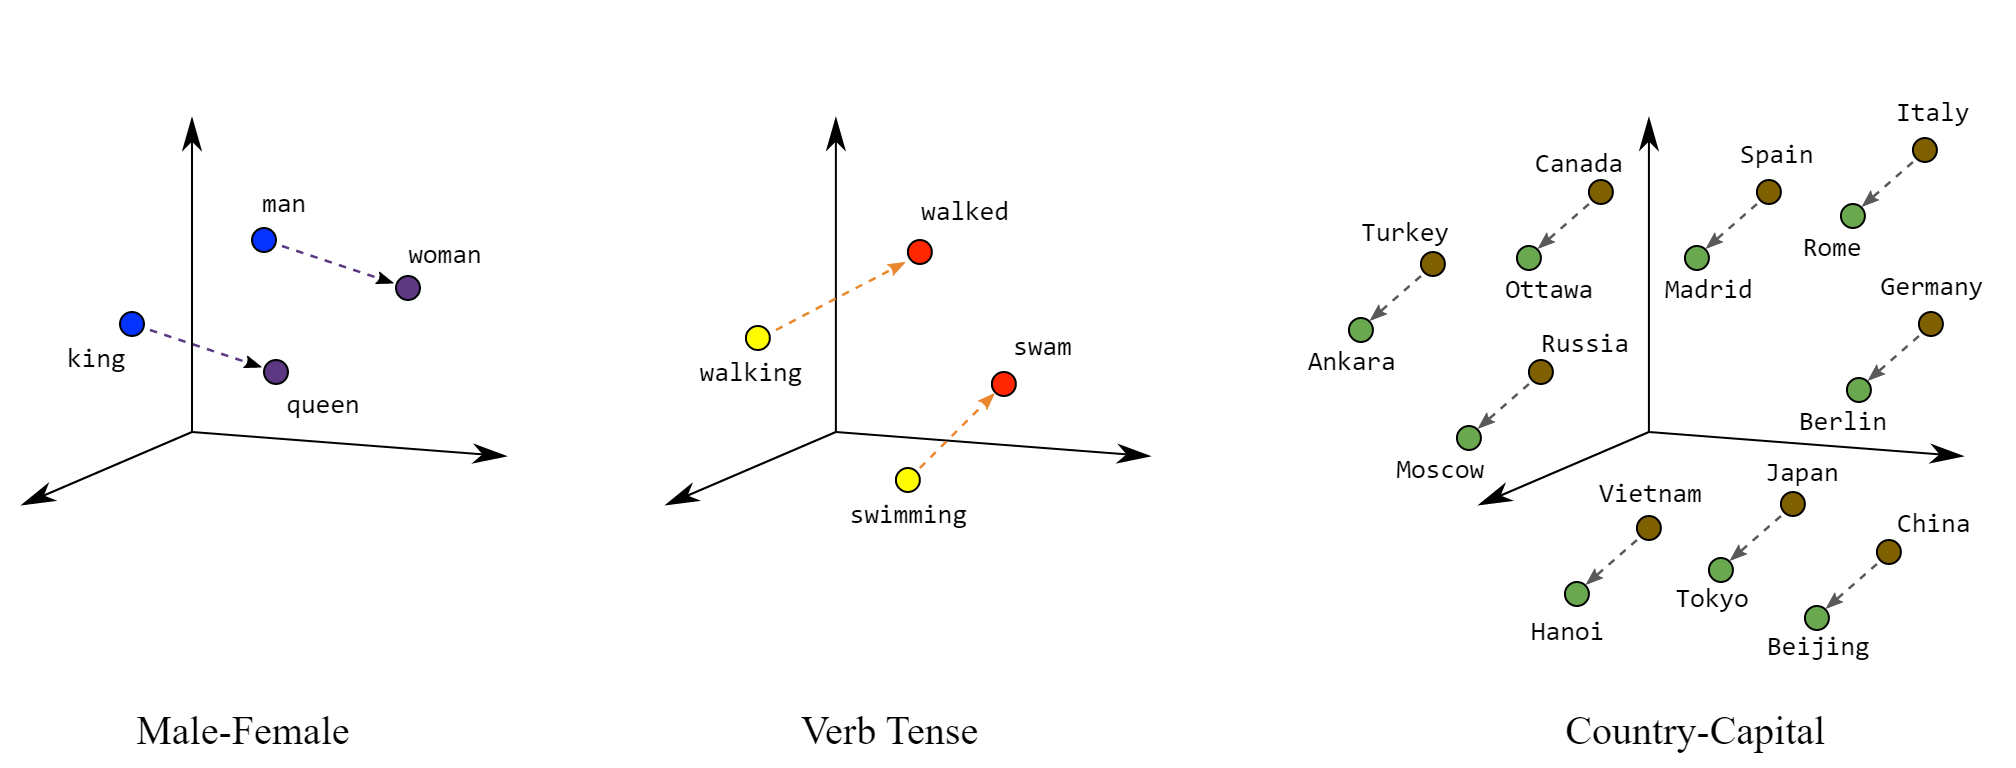

Image retrieved from https://developers.google.com/machine-learning/crash-course/embeddings/translating-to-a-lower-dimensional-space




The **[GloVe](https://nlp.stanford.edu/projects/glove/)** model is trained on the non-zero entries of a global word-word co-occurrence matrix. It is a high speed word embedding technique which is trained on word-word co-occurrence probabilities and have the potential for achieve some form of meaning which can be encoded as vector differences.


The pre-trained **[GloVe](https://nlp.stanford.edu/projects/glove/)** model can be downloaded from https://nlp.stanford.edu/projects/glove/ as text file. 


Each line of the text file contains a word, followed by N numbers. The N numbers describe the vector of the word’s position. N may vary depending on which vectors you downloaded, for this notebook N is 50 (*glove.6B.50d*).

Here is example line from the text file:


|  **Word**  |  **vector 1** |  **vector 2** |... |**vector 50** |
|   ---      |      ---      |      ---      |    ---      |    ---      | 
|  will    |   0.81544     |   0.30171     | ...    | 0.5472     | 
|  business    |  0.0236    |   0.133     | ...    | 0.0231    | 
|  osipov    |  -0.83172    |   0.51419     | ...    | 0.35741    | 
|  burgo    |  0.23552    |   -0.1543    | ...    | 0.33062    | 
|  .    |  .    |   .    | ...    | .    | 
|  .    |  .    |   .    | ...    | .    | 

In [29]:
# Load Glove Model
gloveFile = "data\\glove.6B.50d.txt"
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    with open(gloveFile, encoding="utf8" ) as f:
        content = f.readlines()
    model = {}
    for line in content:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model_Glove = loadGloveModel(gloveFile)

Loading Glove Model
Done. 400000  words loaded!


In [30]:
document1='Biden speaks to the media in Illinois'
document2='The president greets the press in Chicago'

After tokenization and data processing, **the mean of all dimensions for the words of each document is calculated and then cosine similarity is computed for the the calculated means.**

See below how to calculate mean of vectors for the words in document 1

In [31]:
# Calculate the mean of the words for document1
words_doc1=['biden', 'speaks', 'media', 'illinois']
vector1=np.mean([model_Glove[word] for word in words_doc1],axis=0)
vector1

array([-0.37136235,  0.34836225,  0.127715  ,  0.01142275,  0.170685  ,
        0.10783675, -0.54943   , -0.05833   , -0.3658315 , -0.2922925 ,
       -0.57162525, -0.29016983,  0.1514575 , -0.236849  , -0.21799   ,
       -0.1870795 , -0.424835  ,  0.371015  ,  0.124335  ,  0.015865  ,
        0.0558225 ,  0.25916125,  0.2963115 ,  0.1677225 ,  0.3427625 ,
       -1.74525   , -0.171221  ,  0.2790755 , -0.4518675 , -0.15581125,
        1.5698875 , -0.1261165 , -0.08846775, -0.751015  , -0.35271962,
       -0.74032   , -0.4242375 ,  0.1890845 , -0.23348   , -0.0993175 ,
        0.0681125 ,  0.431665  , -0.413375  , -0.15408125, -0.0981175 ,
        0.2137175 , -0.4764175 ,  0.38069   , -0.27330825,  0.7036809 ])

In [32]:
# Calculate the mean of the words for document2

words_doc2=['president', 'greets', 'press', 'chicago']
vector2=np.mean([model_Glove[word] for word in words_doc2],axis=0)
vector2

array([-0.2875575 ,  0.739975  ,  0.0237733 ,  0.2512225 ,  0.35183   ,
       -0.6904025 , -0.961545  ,  0.014195  , -0.40728352, -0.2618205 ,
       -0.317001  ,  0.11280628, -0.189255  ,  0.149157  ,  0.423172  ,
       -0.06557462, -0.486145  , -0.13448678, -0.0694575 , -0.21853075,
        0.39249   ,  0.4086275 , -0.06371225, -0.1018    ,  0.0139625 ,
       -1.53481   ,  0.198165  ,  0.11645425, -0.4932975 , -0.120263  ,
        1.6426775 ,  0.3530525 , -0.49286   , -0.60518   , -0.66076   ,
       -0.43183712, -0.2381105 , -0.10743325,  0.1384965 ,  0.0297125 ,
       -0.0182725 ,  0.609915  , -0.34127775, -0.5055075 ,  0.3255675 ,
        0.34131775, -0.606375  ,  0.1581875 , -0.1109025 ,  0.259911  ])

Here is cosine similarity between two vectors:

In [33]:
cosine = 1-scipy.spatial.distance.cosine(vector1, vector2)
cosine

0.798865081079057

Function `Glove_Cosine_Embedding` automatically do all these steps as below:

In [34]:
cosine_all,df=Glove_Cosine_Embedding(document1,document2,model_Glove,Lemmatization=False,stopwords=True)
print (cosine_all)

0.799


Here are cosine similarity between individual words of documents. As expected, 'media' and 'press' has the highest similarity, followed by 'illinois' and 'chicago'.

In [35]:
for iwords in words_doc1:
    for jwords in words_doc2:
        cosine_=1-scipy.spatial.distance.cosine(model_Glove[iwords], model_Glove[jwords])
        print (f"""Cosine similarity between word vectors of '{iwords}' and '{jwords}' is {cosine_}""")

Cosine similarity between word vectors of 'biden' and 'president' is 0.5896286155671835
Cosine similarity between word vectors of 'biden' and 'greets' is 0.2696876692806591
Cosine similarity between word vectors of 'biden' and 'press' is 0.3725718594545766
Cosine similarity between word vectors of 'biden' and 'chicago' is 0.16630572725196802
Cosine similarity between word vectors of 'speaks' and 'president' is 0.4485533972187341
Cosine similarity between word vectors of 'speaks' and 'greets' is 0.3641897239883817
Cosine similarity between word vectors of 'speaks' and 'press' is 0.4651384804862093
Cosine similarity between word vectors of 'speaks' and 'chicago' is 0.22227599643092333
Cosine similarity between word vectors of 'media' and 'president' is 0.5597159993321537
Cosine similarity between word vectors of 'media' and 'greets' is 0.0393048021228567
Cosine similarity between word vectors of 'media' and 'press' is 0.7882143659574558
Cosine similarity between word vectors of 'media' a

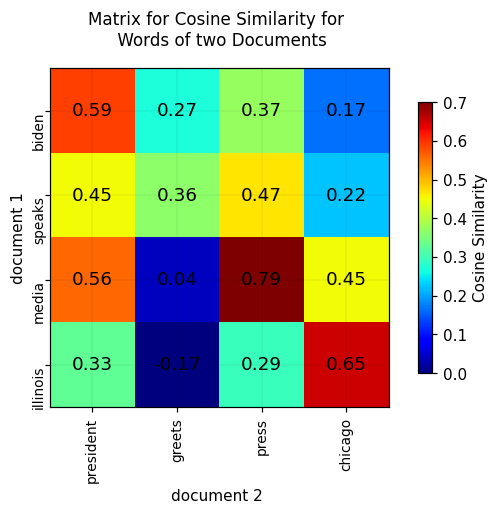

In [36]:
font = {'size'   : 10}
plt.rc('font', **font)
fig, ax=plt.subplots(figsize=(7, 4), dpi= 110, facecolor='w', edgecolor='k')  
    
matrix_occure_prob(df,title='Matrix for Cosine Similarity for \n Words of two Documents',axt=ax,pad=15,
                   lable1='document 2 ',vmin=0,vmax=0.7,cbar_per=False,lable2='document 1',
                   num_ind=True,txtfont=12,xline=False)

# Word Mover’s Distance

* Word Mover’s Distance (WMD) is based on recent results in word embeddings that learn semantically meaningful representations for words from local co-occurrences in sentences. WMD leverages the results of advanced embedding techniques like **word2vec** and **Glove**.


* Word Mover’s Distance (WMD) enables us to assess the **“distance” between two documents in a meaningful way even when they have no words in common.** It has been shown to **outperform many of the state-of-the-art methods**.


* The distance between two text documents A and B is calculated by the **minimum cumulative distance that words from the text document A needs to travel to match exactly the point cloud of text document B.** Watch this video on [YouTube](https://www.youtube.com/watch?v=nX1g_wPSYOI&ab_channel=MinsukHeo%ED%97%88%EB%AF%BC%EC%84%9D) that shows how to calculate the minimum cumulative distance.

 <p>&nbsp;</p>
<img src="https://raw.githubusercontent.com/MehdiRezvandehy/Machine-Learning-Course-University-of-Calgary/master/Images/WMD_example.png"
alt="drawing" width="900"/>
<p>&nbsp;</p>


* [gensim](https://radimrehurek.com/gensim/) Python library is excellent to implement word movers distance techniques on word embeddings. 

The WMD distance has several intriguing properties:
1. It is **hyper-parameter free** and straight-forward to understand and use;
2. It is **highly interpretable** as the distance between two documents can be broken down and explained as the sparse distances between few individual words
3. It naturally incorporates the knowledge encoded in the **word2vec** / **Glove space** and leads to high retrieval accuracy.

First `GoogleNews-vectors-negative300.bin.gz` should be downloaded from [here](https://code.google.com/archive/p/word2vec/) (warning: 1.5 GB). It can be loaded by `gensim` model as below:

In [37]:
from time import time
start = time()
import os

from gensim import models  
model_WMD = models.KeyedVectors.load_word2vec_format('./data/GoogleNews-vectors-negative300.bin.gz', binary=True)

print('Cell took %.2f seconds to run.' % (time() - start))

Cell took 46.17 seconds to run.


In [38]:
document1='President greets the press in Chicago'
document2='Biden speaks to media in Illinois'

There are three steps below to measure WMD distance:

* **Step 1**

In [39]:
# CountVectorizer to get unique words
vect = CountVectorizer(stop_words="english").fit([document1, document2])
print("Unique words are: ",  ", ".join(vect.get_feature_names()))

Unique words are:  biden, chicago, greets, illinois, media, president, press, speaks


* **Step 2**

In [40]:
# Calculate distance between words from WMD
list_=vect.get_feature_names()
D_=np.zeros((len(list_),len(list_)))
for ii in range(len(list_)):
    for jj in range(len(list_)):
        D_[ii,jj]=model_WMD.wmdistance([list_[ii]],[list_[jj]])

* **Step 3**

Finally, we need to apply [Earth Mover’s Distance](https://en.wikipedia.org/wiki/Earth_mover%27s_distance) which is a **measure of the distance between two probability distributions over a region D.** Informally, if the distributions are interpreted as two different ways of piling up a certain amount of earth (dirt) over the region D, the EMD is the minimum cost of turning one pile into the other; where the cost is assumed to be the amount of dirt moved times the distance by which it is moved. See a simple example below:

In [41]:
from pyemd import emd
first_histogram = np.array([0.0, 1.0])
second_histogram = np.array([5.0, 3.0])
distance_matrix = np.array([[0.0, 0.5],
                            [0.5, 0.0]])
emd(first_histogram, second_histogram, distance_matrix)

3.5

Now we can apply EMD to calculate the distance between two distributions:

In [42]:
v_1, v_2 = vect.transform([document1, document2])
v_1 = v_1.toarray().ravel()
v_2 = v_2.toarray().ravel()        

# pyemd needs double precision input
v_1 = v_1.astype(np.double)
v_2 = v_2.astype(np.double)
v_1 /= v_1.sum()
v_2 /= v_2.sum()
D_ = D_.astype(np.double)
#D_ /= np.max(D_)  # just for comparison purposes
print("d(doc_1, doc_2) = {:.2f}".format(emd(v_1, v_2, D_)))

d(doc_1, doc_2) = 1.01


All the steps above can be automatically applied by `Word_Mover_Distance` function:

In [43]:
document1='Biden speaks to the media in Illinois'
document2='The president greets the press in Chicago'

WMD_all,df_WMD=Word_Mover_Distance(document1,document2,model_WMD,Lemmatization=False, stopwords=True)
print ('Distance between two documents is:', np.round(WMD_all,2))

Distance between two documents is: 1.01


Figure below shows Word Mover Distance between the words of document 1 and document 2 

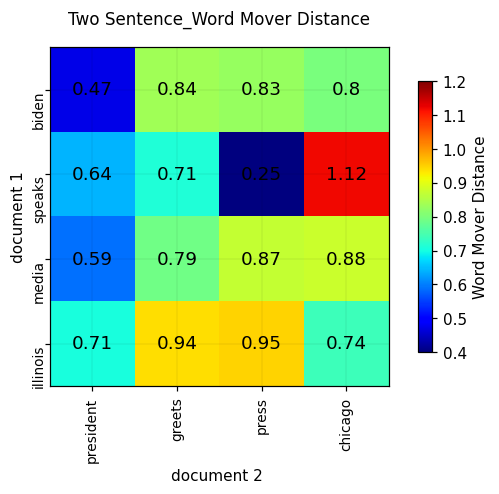

In [44]:
font = {'size'   : 10}
plt.rc('font', **font)
fig, ax=plt.subplots(figsize=(7, 4), dpi= 110, facecolor='w', edgecolor='k') 

matrix_occure_prob(df_WMD,vmin=0.4,vmax=1.2,title='Two Sentence_Word Mover Distance',num_ind=True,axt=ax,pad=15,
                   txtfont=12,lable1='document 2 ',lable2='document 1',label='Word Mover Distance',xline=False)

Here are Word Mover Distance between individual words of documents. 'speaks' and 'press' has the lowest distance, followed by 'biden' and 'president'. Word Mover Distance cannot detect low distance between 'illinois' and 'chicago'

# Example

Here is a corpus of 10 documents. We want to calculate lexical (Jaccard and tf-idf) and semantical similarity (Glove and Word Mover's Distance):

In [45]:
corpus = ["Global warming is happening", 
        "The weather is not good to play golf today", 
        "Never compare an apple to an orange", 
        "Apple and orange are completely different from each other",   
        "Ocean temperature is rising rapidly",
        "AI has taken the world by storm",
        "It is rainy today so we should postpone our golf game", 
        "I love reading books than watching TV", 
        "People say I am a bookworm, in fact, I do not want to waste my time on TV",
         "AI has transformed the way the world works"]

## Lexical Similarity

### Jaccard Similarity

In [46]:
df=pd.DataFrame()

for doc1 in corpus:
    sim_all=[]
    for doc2 in corpus:
        tmp=Jaccard_Similarity(doc1,doc2,stopwords=True)
        sim_all.append(tmp)
    df[doc1]=sim_all    
df.index=corpus    

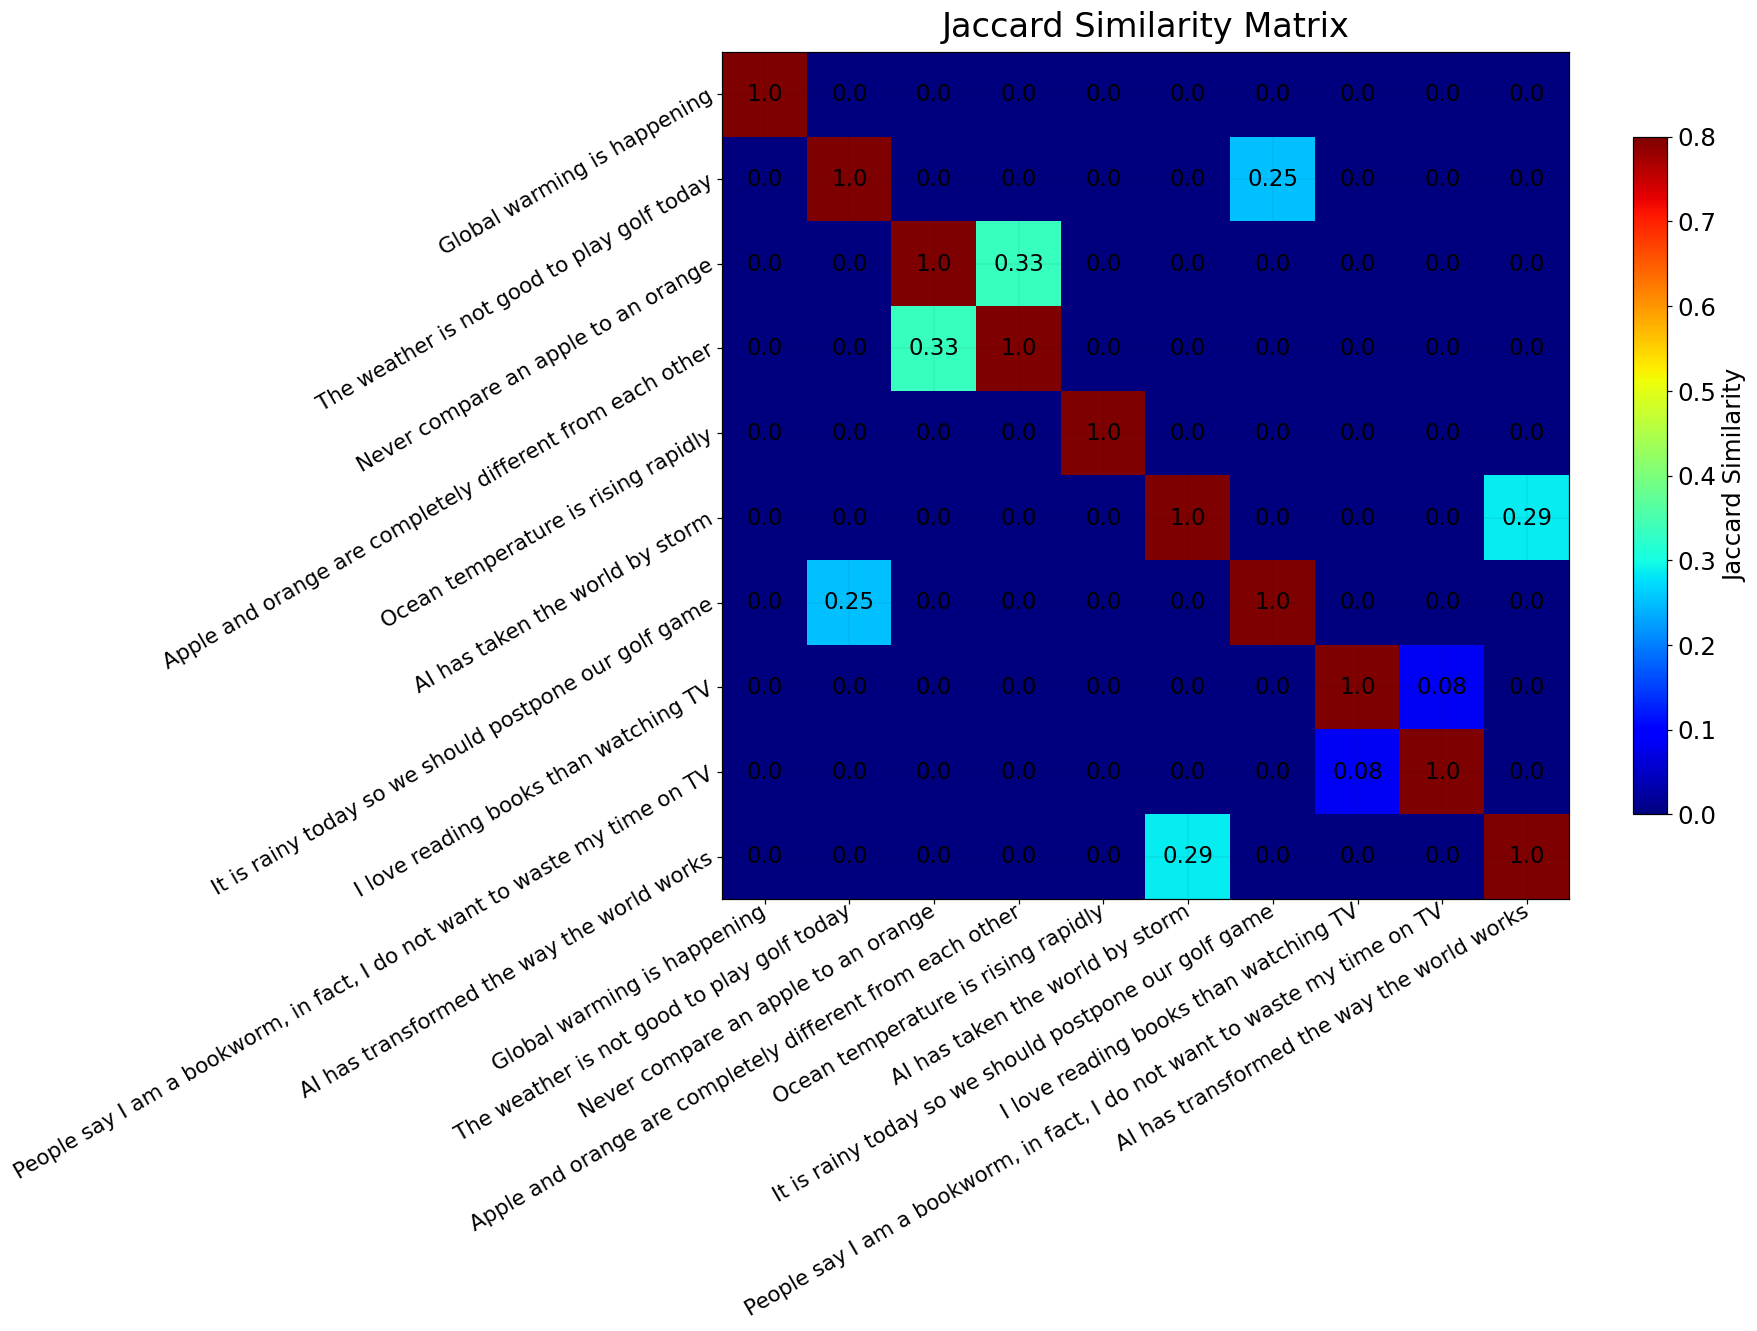

In [47]:
font = {'size'   : 16}
plt.rc('font', **font)
fig, ax=plt.subplots(figsize=(15, 10), dpi= 110, facecolor='w', edgecolor='k')  
    
matrix_occure_prob(df,title='Jaccard Similarity Matrix',lable1='',vmin=0, pad=10,axt=ax,
                  vmax=0.8,cbar_per=False,lable2='',num_ind=True,txtfont=15,xline=False,fontsize=22,
                   lbl_font=14,label='Jaccard Similarity',rotation_x=30)

### tf-idf+ Cosine Similarity

In [48]:
df=pd.DataFrame()

for doc1 in corpus:
    sim_all=[]
    for doc2 in corpus:
        tmp=Cosine_Similarity_tf_idf(doc1,doc2,stopwords=True, tf_idf=True)
        sim_all.append(tmp)
    df[doc1]=sim_all    
df.index=corpus    

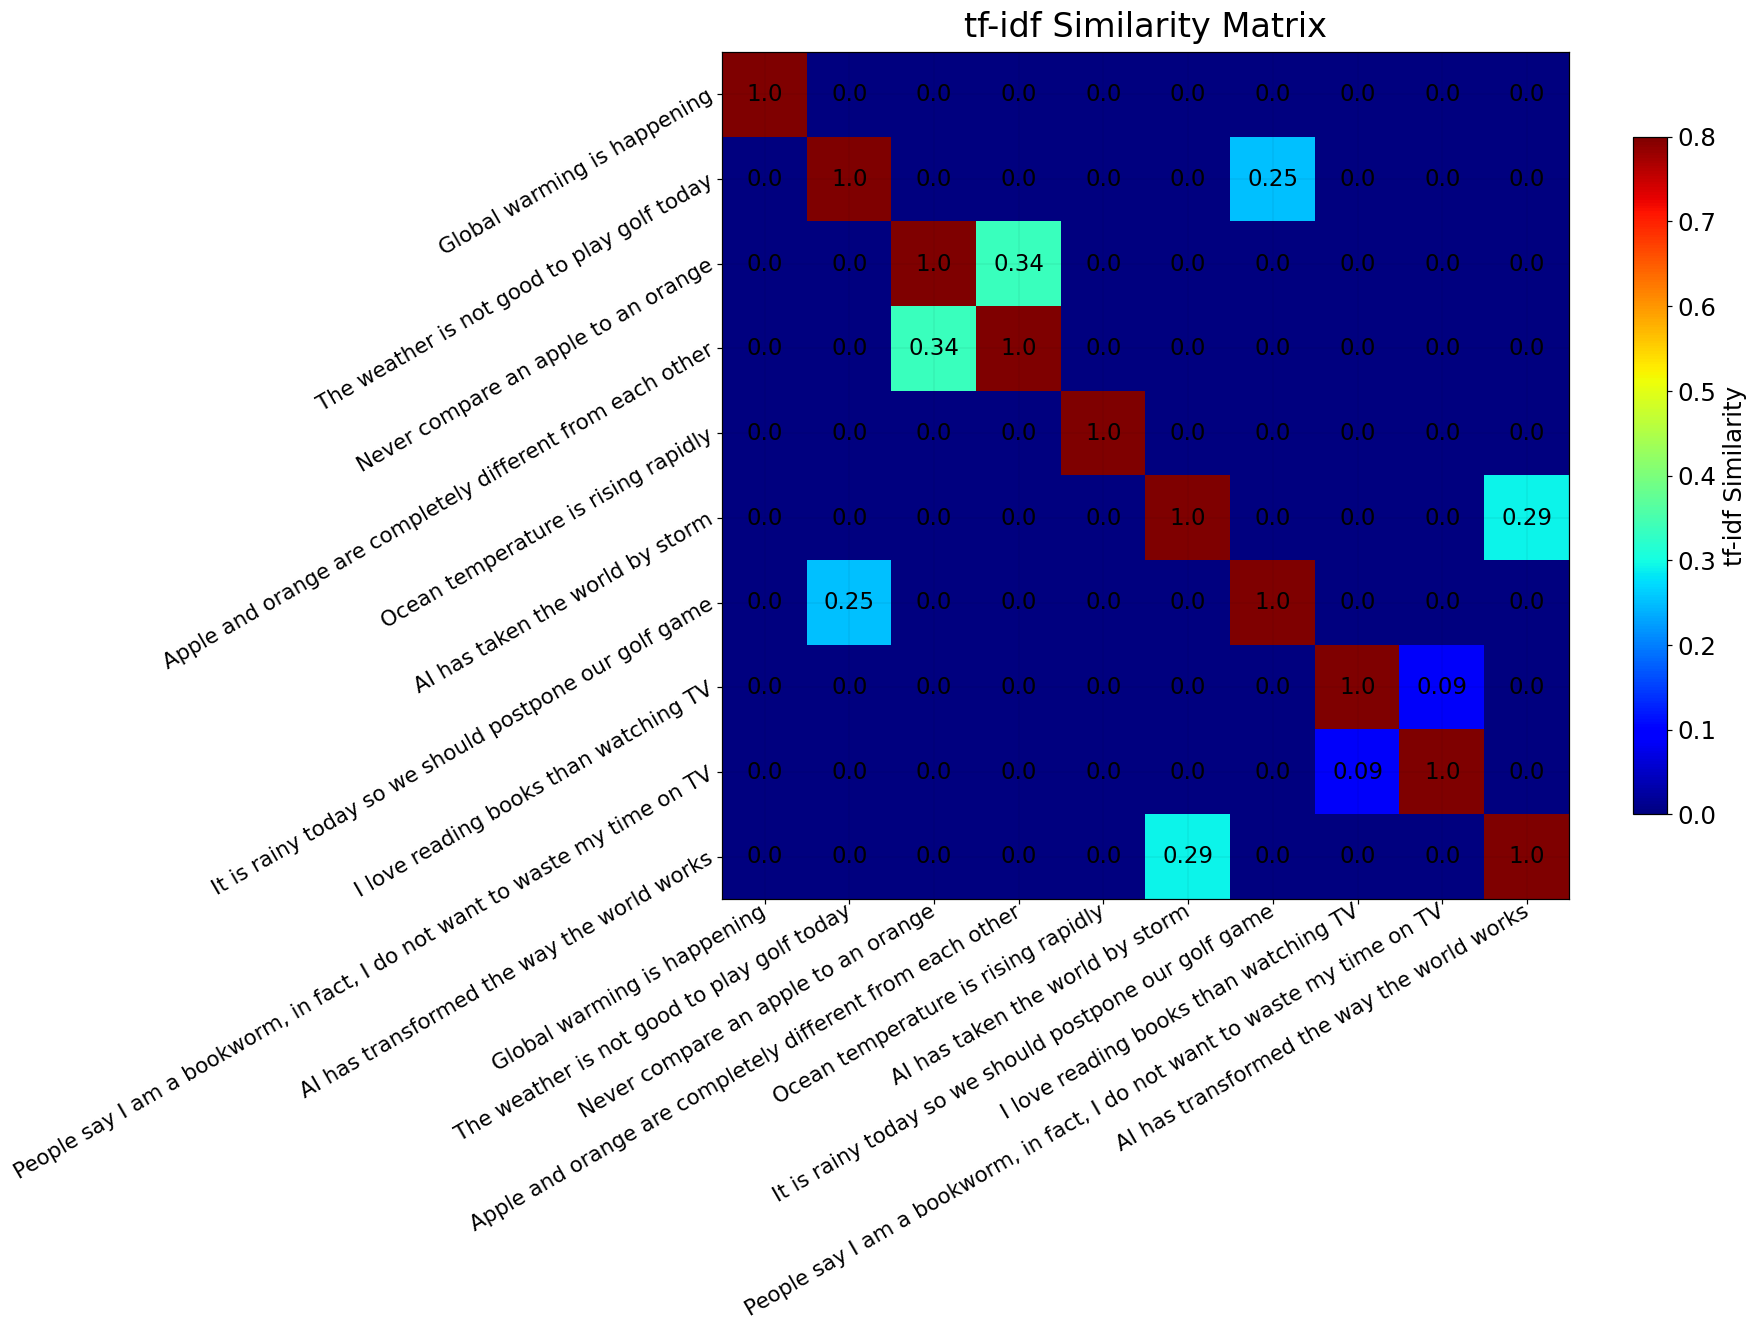

In [49]:
font = {'size'   : 16}
plt.rc('font', **font)
fig, ax=plt.subplots(figsize=(15, 10), dpi= 110, facecolor='w', edgecolor='k')  
    
matrix_occure_prob(df,title='tf-idf Similarity Matrix',lable1='',vmin=0, pad=10,axt=ax,
                  vmax=0.8,cbar_per=False,lable2='',num_ind=True,txtfont=15,xline=False,fontsize=22,
                   lbl_font=14,label='tf-idf Similarity',rotation_x=30)

## Semantical Similarity

### Glove Model + Cosine Similarity

In [50]:
df=pd.DataFrame()

for doc1 in corpus:
    sim_all=[]
    for doc2 in corpus:
        tmp,_=Glove_Cosine_Embedding(doc1,doc2,model_Glove,stopwords=True)
        sim_all.append(tmp)
    df[doc1]=sim_all    
df.index=corpus    

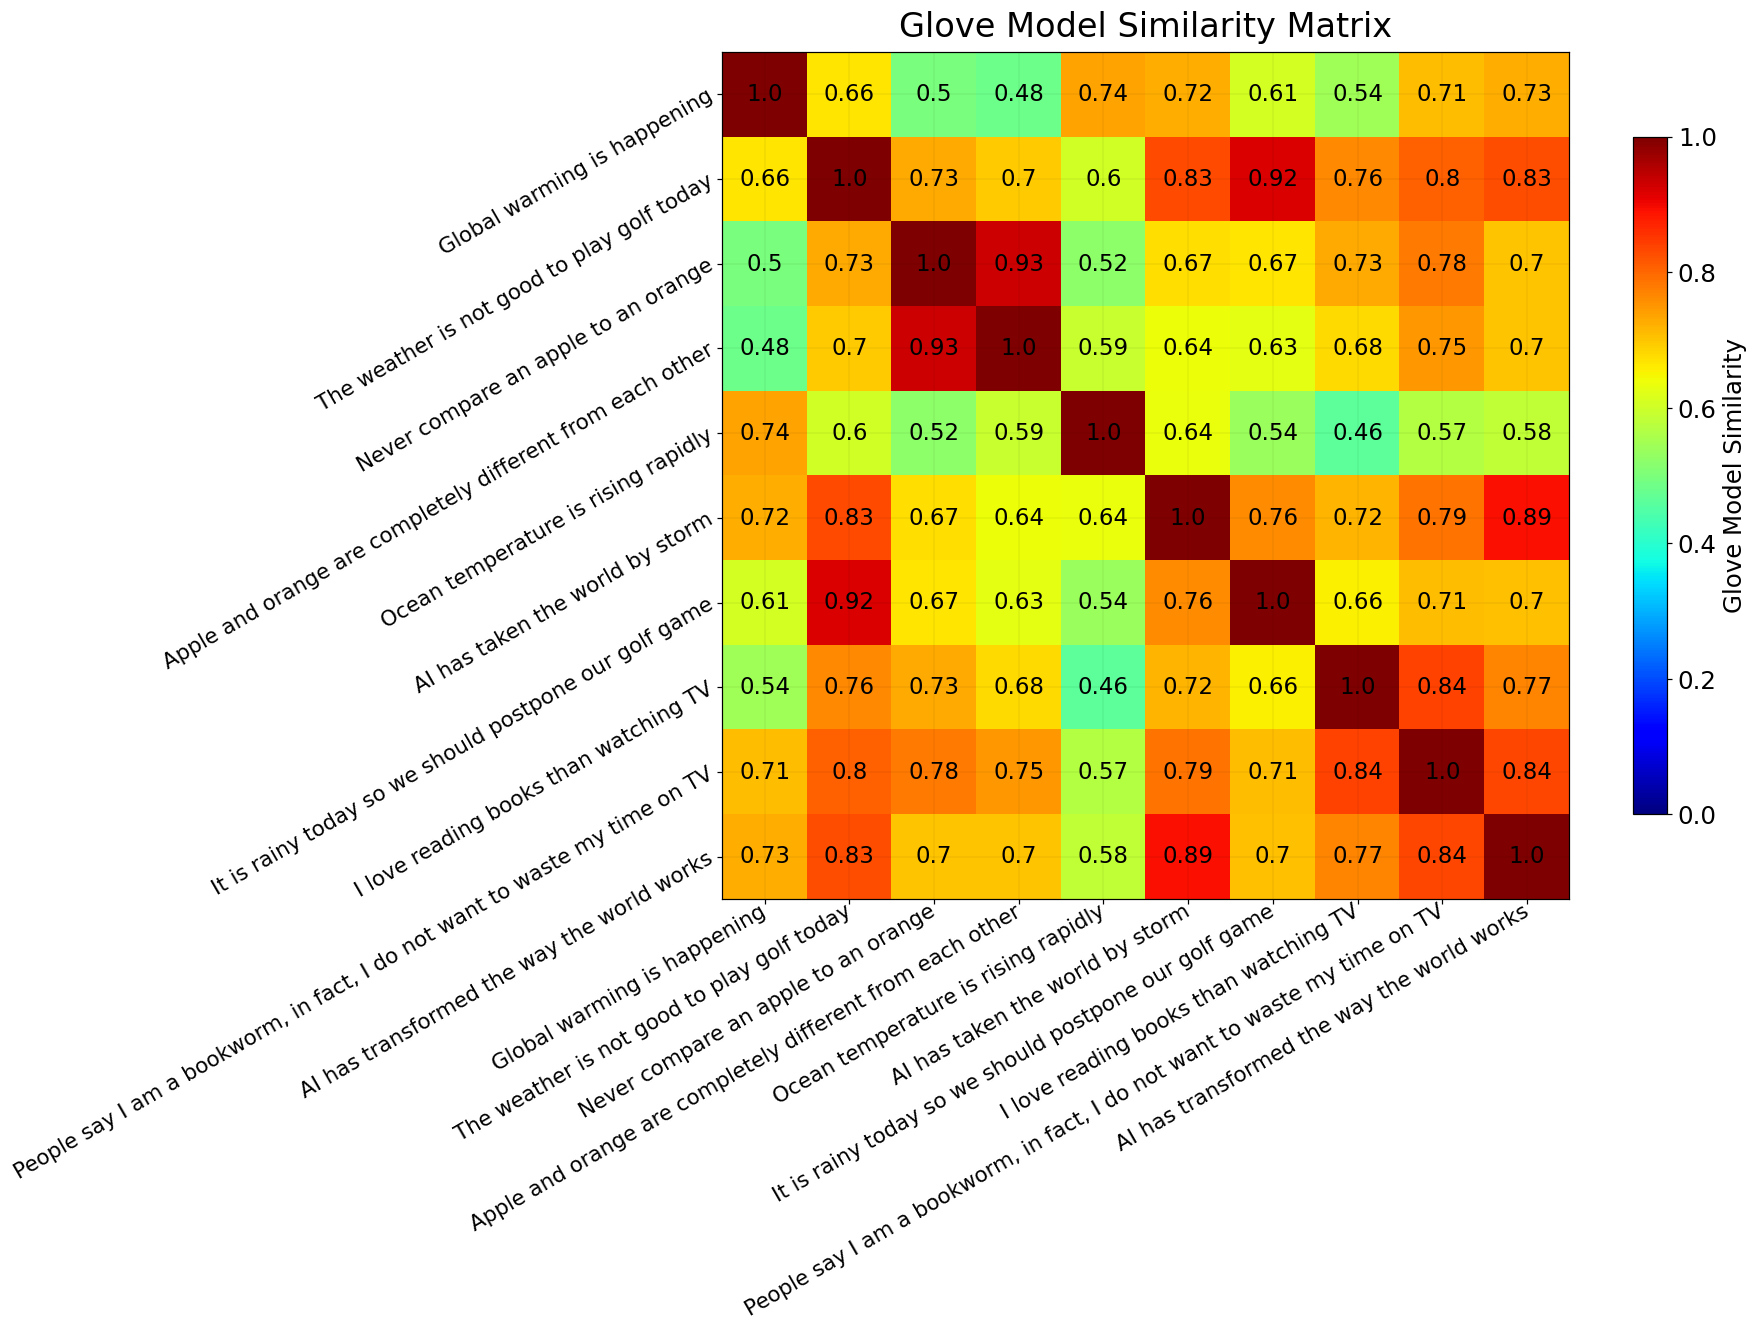

In [51]:
font = {'size'   : 16}
plt.rc('font', **font)
fig, ax=plt.subplots(figsize=(15, 10), dpi= 110, facecolor='w', edgecolor='k')  
    
matrix_occure_prob(df,title='Glove Model Similarity Matrix',lable1='',vmin=0, pad=10,axt=ax,
                  vmax=1,cbar_per=False,lable2='',num_ind=True,txtfont=15,xline=False,fontsize=22,
                   lbl_font=14,label='Glove Model Similarity',rotation_x=30)

### Word Mover’s Distance

In [52]:
df=pd.DataFrame()

for doc1 in corpus:
    sim_all=[]
    for doc2 in corpus:
        tmp,_=Word_Mover_Distance(doc1,doc2,model_WMD, stopwords=True)
        sim_all.append(tmp)
    df[doc1]=sim_all    
df.index=corpus    

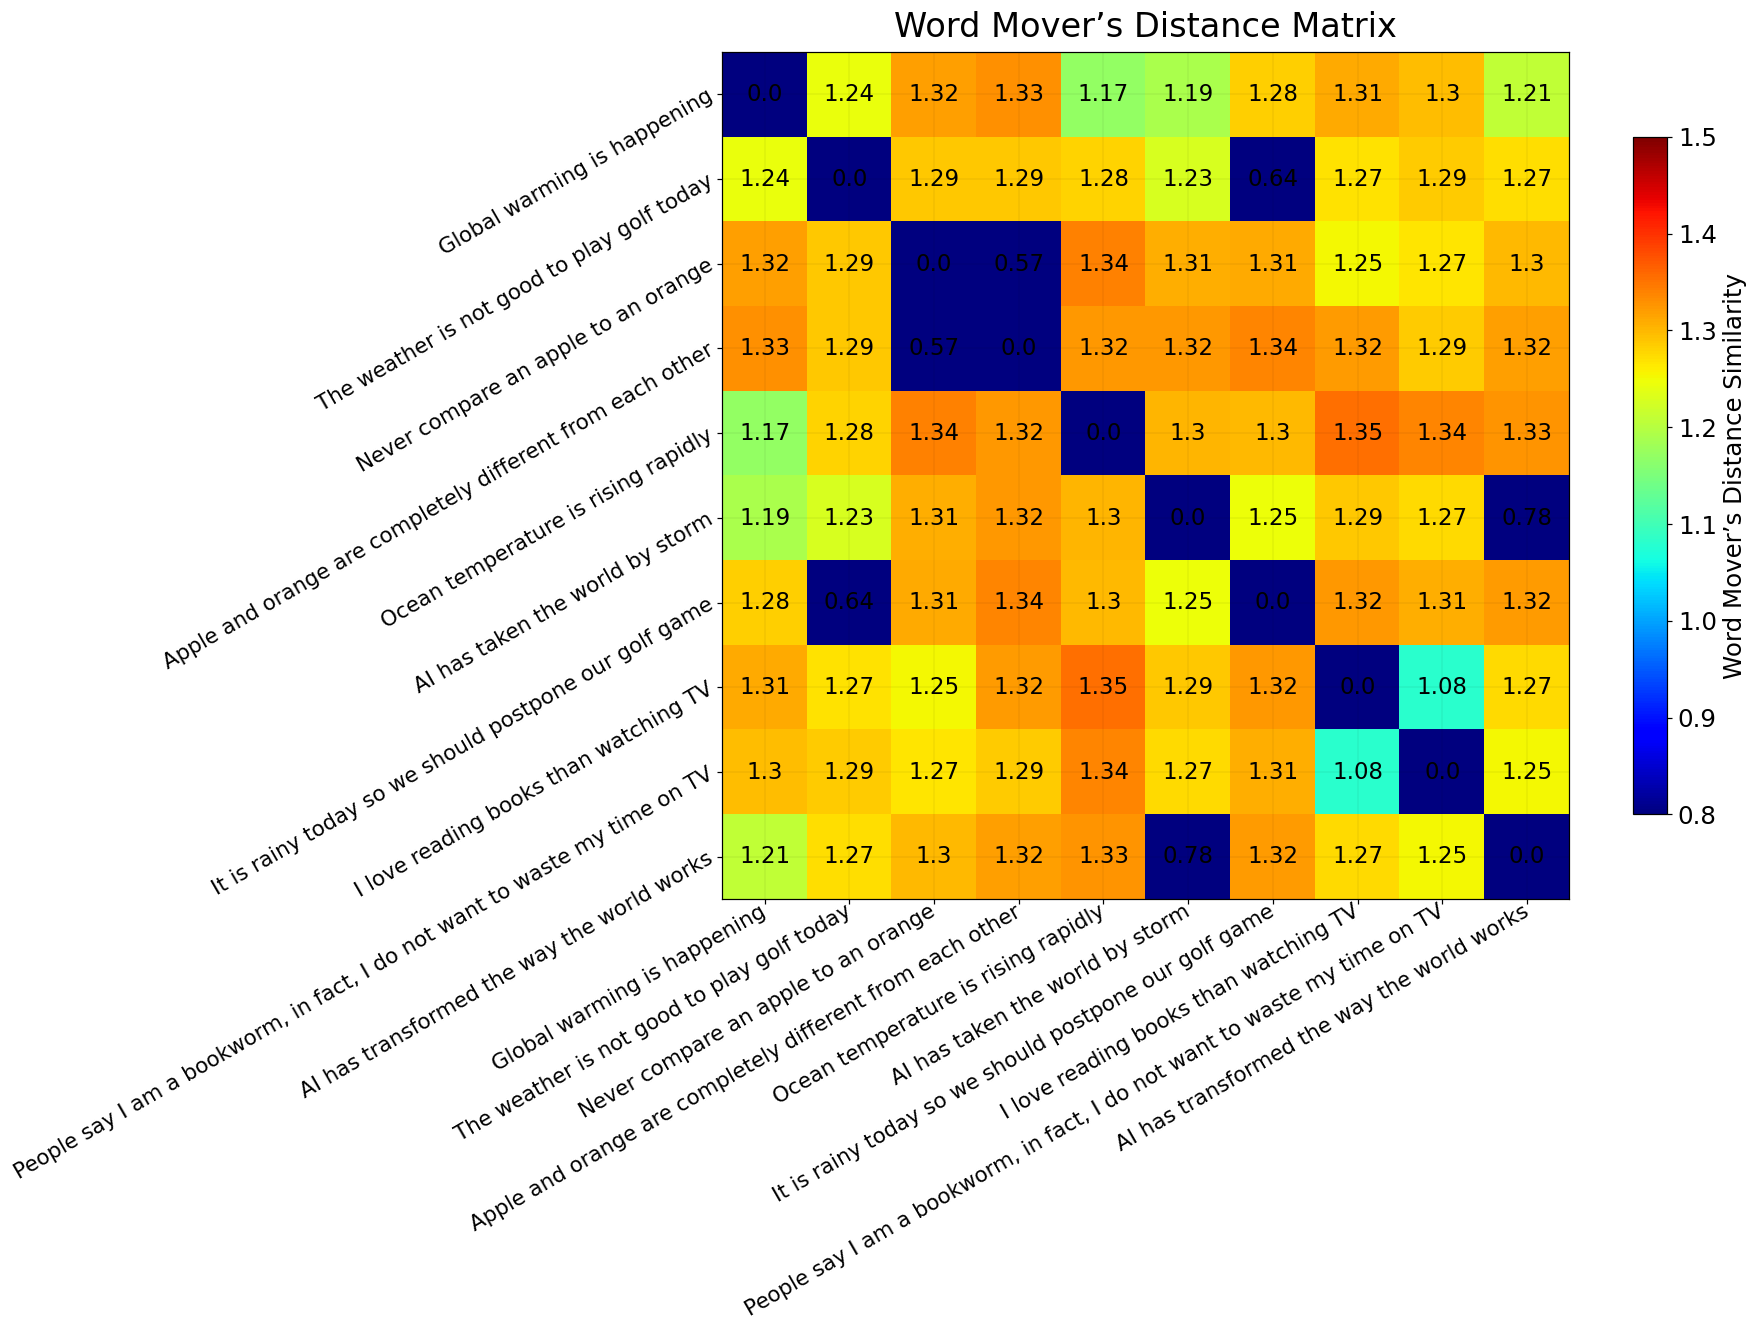

In [53]:
font = {'size'   : 16}
plt.rc('font', **font)
fig, ax=plt.subplots(figsize=(15, 10), dpi= 110, facecolor='w', edgecolor='k')  
    
matrix_occure_prob(df,title='Word Mover’s Distance Matrix',lable1='',vmin=0.8, pad=10,axt=ax,
                  vmax=1.5,cbar_per=False,lable2='',num_ind=True,txtfont=15,xline=False,fontsize=22,
                   lbl_font=14,label='Word Mover’s Distance Similarity',rotation_x=30)